In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("tips.csv")

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Boxplot

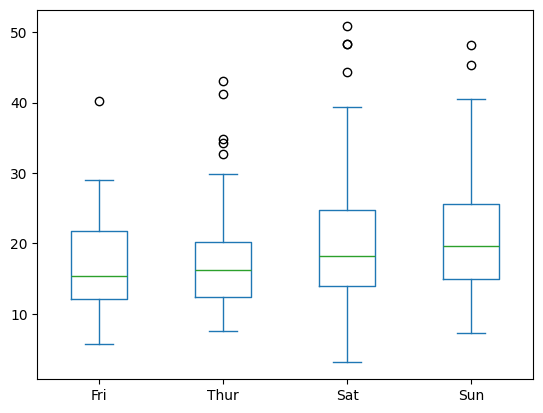

In [4]:
def boxplot_sorted(df, by, column):
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.median().sort_values()
  df2[meds.index].plot(kind='box',rot=0)

boxplot_sorted(data, by="day", column="total_bill")
# plt.savefig('boxplot.png')

# Histogram

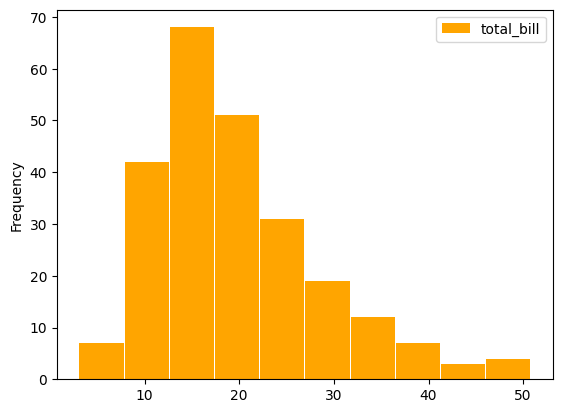

In [5]:
fig = data.plot(kind='hist', column='total_bill', bins=10, rwidth=0.98, color='orange')
# plt.savefig('histogram.png')

# Density plot

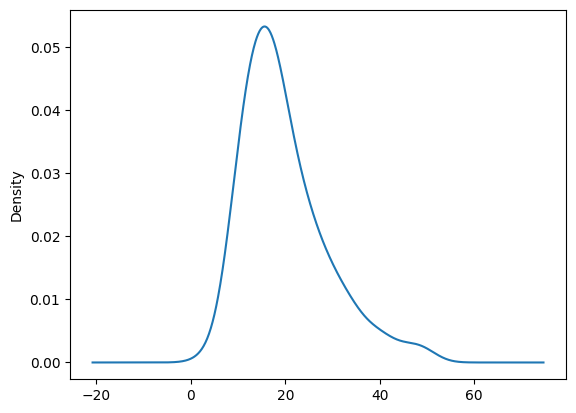

In [6]:
total_bill = data['total_bill']
fig = total_bill.plot(kind='density')
# plt.savefig('density.png')

# Correlation heatmap

In [7]:
co_mtx = data.corr(numeric_only=True)
co_mtx

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

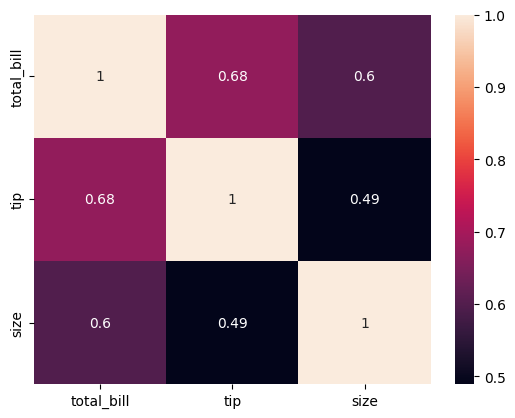

In [8]:
sns.heatmap(co_mtx,annot=True)
# plt.savefig('co_heatmap.png')

# Scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

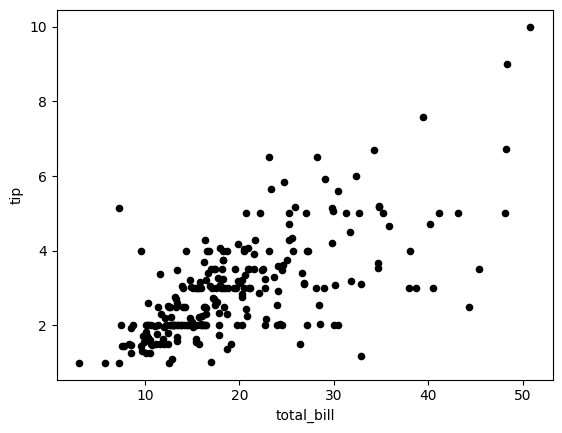

In [9]:
data.plot(kind='scatter', x='total_bill', y='tip', c='black')
# plt.savefig('scatter.png')

# Hexagonal binning

<Axes: xlabel='total_bill', ylabel='tip'>

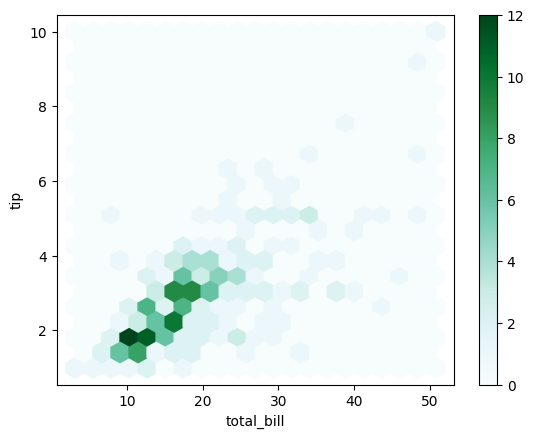

In [10]:
data.plot(kind='hexbin', x='total_bill', y='tip', gridsize=20)
# plt.savefig('hexbin.png')

# Contour plot

<Axes: xlabel='total_bill', ylabel='tip'>

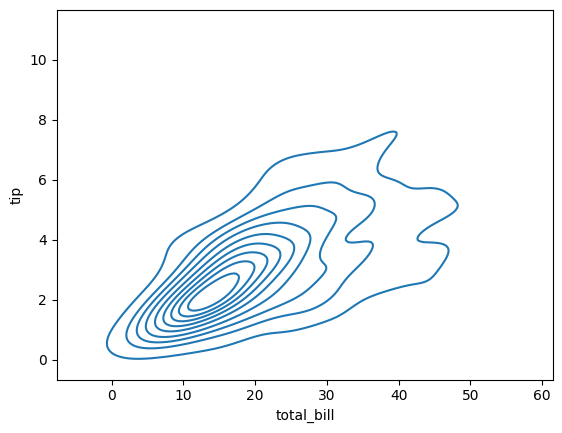

In [11]:
sns.kdeplot(data=data, x='total_bill', y='tip')
# plt.savefig('contour.png')

# Violin plot

<Axes: xlabel='day', ylabel='total_bill'>

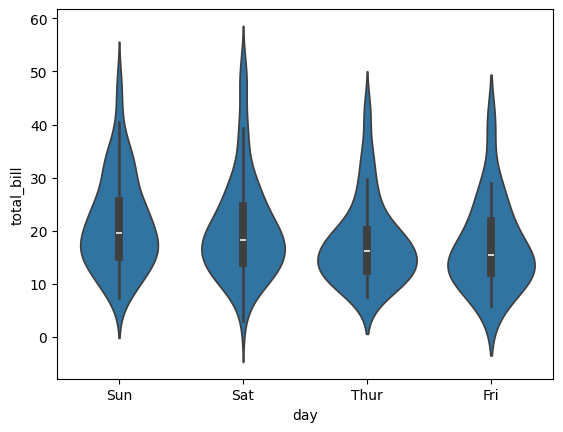

In [12]:
sns.violinplot(data, x='day', y='total_bill')
# plt.savefig('violin.png')

# Frequency table

In [13]:
tb_bin = pd.cut(data['total_bill'], bins=10)
tb_bin.value_counts()

total_bill
(12.618, 17.392]    68
(17.392, 22.166]    51
(7.844, 12.618]     42
(22.166, 26.94]     31
(26.94, 31.714]     19
(31.714, 36.488]    12
(3.022, 7.844]       7
(36.488, 41.262]     7
(46.036, 50.81]      4
(41.262, 46.036]     3
Name: count, dtype: int64

# Bar chart & Pie chart

<Axes: ylabel='total_bill'>

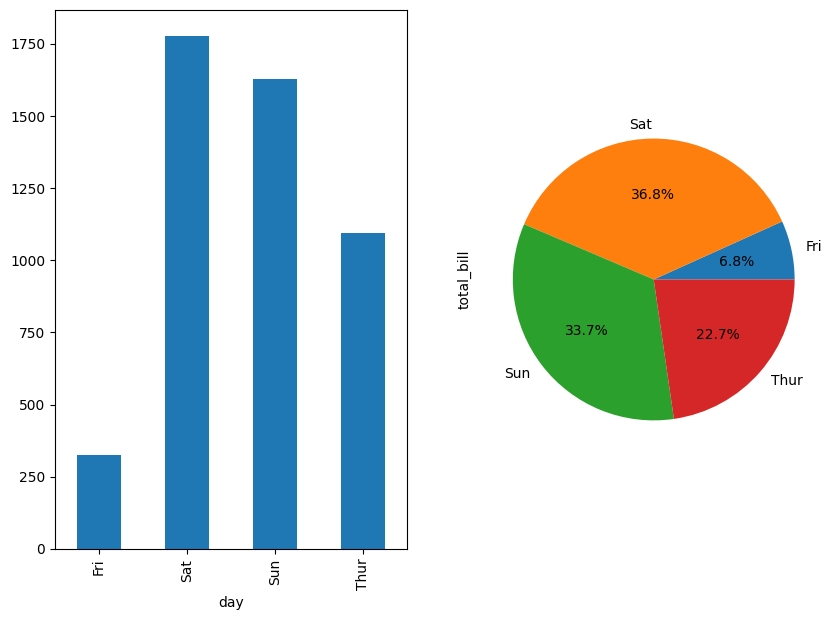

In [14]:
total_bill_by_day = data.groupby('day')['total_bill'].sum()
fig, axes = plt.subplots(ncols=2, nrows=1)
total_bill_by_day.plot(kind='bar', ax=axes[0], figsize=[10,7])
total_bill_by_day.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', figsize=[10,7])
# plt.savefig('total_sale_by_day.png')

# Contingency table

In [15]:
pd.crosstab([data.day, data.sex], data.smoker, margins= True)

smoker        No  Yes  All
day  sex                  
Fri  Female    2    7    9
     Male      2    8   10
Sat  Female   13   15   28
     Male     32   27   59
Sun  Female   14    4   18
     Male     43   15   58
Thur Female   25    7   32
     Male     20   10   30
All          151   93  244